## 05_Folium에서 다뤘던 Heatmap(열지도/온도지도)을 다른 패키지를 이용해서 만들어 보겠습니다.

## 관련 패키지 불러오기

In [6]:
import pandas as pd
import geopandas as gpd

In [7]:
# !pip install seaborn
# !pip install contextily

In [8]:
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid') #whitegrid, dark, white, ticks
mpl.rc('font', family='Malgun Gothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (10,10) #차트 사이즈

In [9]:
#import mapclassify as mc
import contextily as ctx  #conda install contextily 또는 pip install contextily

## 데이터

### CCTV 포인트 공간데이터

In [10]:
# shp 로딩
gdf_cctv = gpd.read_file('data/shp/gdf_cctv_sl03.shp', encoding='utf-8')  #euc-kr, euckr, utf-8, cp949 중 선택
gdf_cctv.crs  #좌표계 확인용 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
gdf_cctv3857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   admin_nm    7000 non-null   object  
 1   addr_rd     6683 non-null   object  
 2   addr_jb     6346 non-null   object  
 3   purpose     7000 non-null   object  
 4   cctv_cnt    7000 non-null   object  
 5   pixel       5835 non-null   object  
 6   direction   4107 non-null   object  
 7   period      6554 non-null   object  
 8   date_insta  6219 non-null   object  
 9   tel         7000 non-null   object  
 10  lat         7000 non-null   float64 
 11  lon         7000 non-null   float64 
 12  date_make   7000 non-null   object  
 13  offer_admi  7000 non-null   object  
 14  offer_ad_1  7000 non-null   object  
 15  sl          7000 non-null   int64   
 16  zscore_lon  7000 non-null   float64 
 17  outliers    7000 non-null   int64   
 18  zscore_lat  7000 non-null   float64 
 19

In [11]:
# Dataframe you want to plot
gdf_cctv3857 = gdf_cctv.to_crs(epsg=3857) # reproject it in Web mercator
# Geometry를 이용하여 X, Y 좌표 항목을 생성 
gdf_cctv3857["x"] = gdf_cctv3857.geometry.x
gdf_cctv3857["y"] = gdf_cctv3857.geometry.y
gdf_cctv3857.head(3)

admin_nm                                addr_rd        addr_jb purpose  \
0  서울특별시 영등포구                선유로13길 25,서울영문초등학교 사거리앞      선유로13길 25    생활방범   
1  서울특별시 영등포구  문래로4길 4,현대2차APT 202동 옆 서부간선도로 사잇길 육교앞        문래로4길 4    생활방범   
2  서울특별시 영등포구                         선유로9나길 22,사거리앞  문래동5가 12 사거리앞    생활방범   

  cctv_cnt pixel direction period date_insta           tel  ...   date_make  \
0        3  None  360도 전방면     30    2018-08  02-2670-4067  ...  2020-05-06   
1        2  None  360도 전방면     30    2018-08  02-2670-4067  ...  2020-05-06   
2        3  None  360도 전방면     30    2018-08  02-2670-4067  ...  2020-05-06   

   offer_admi  offer_ad_1 sl zscore_lon  outliers  zscore_lat  \
0     3180000  서울특별시 영등포구  0  -1.348028         0   -0.950876   
1     3180000  서울특별시 영등포구  0  -1.406838         0   -0.937394   
2     3180000  서울특별시 영등포구  0  -1.358297         0   -1.007738   

                           geometry             x             y  
0  POINT (14124991.821 4511747.327)  1.412499e+07  4.511747e+06  
1  POINT (14124451.882 4511863.040)  1.412445e+07  4.511863e+06  
2  POINT (14124897.547 4511259.295)  1.412490e+07  4.511259e+06  

[3 rows x 22 columns]

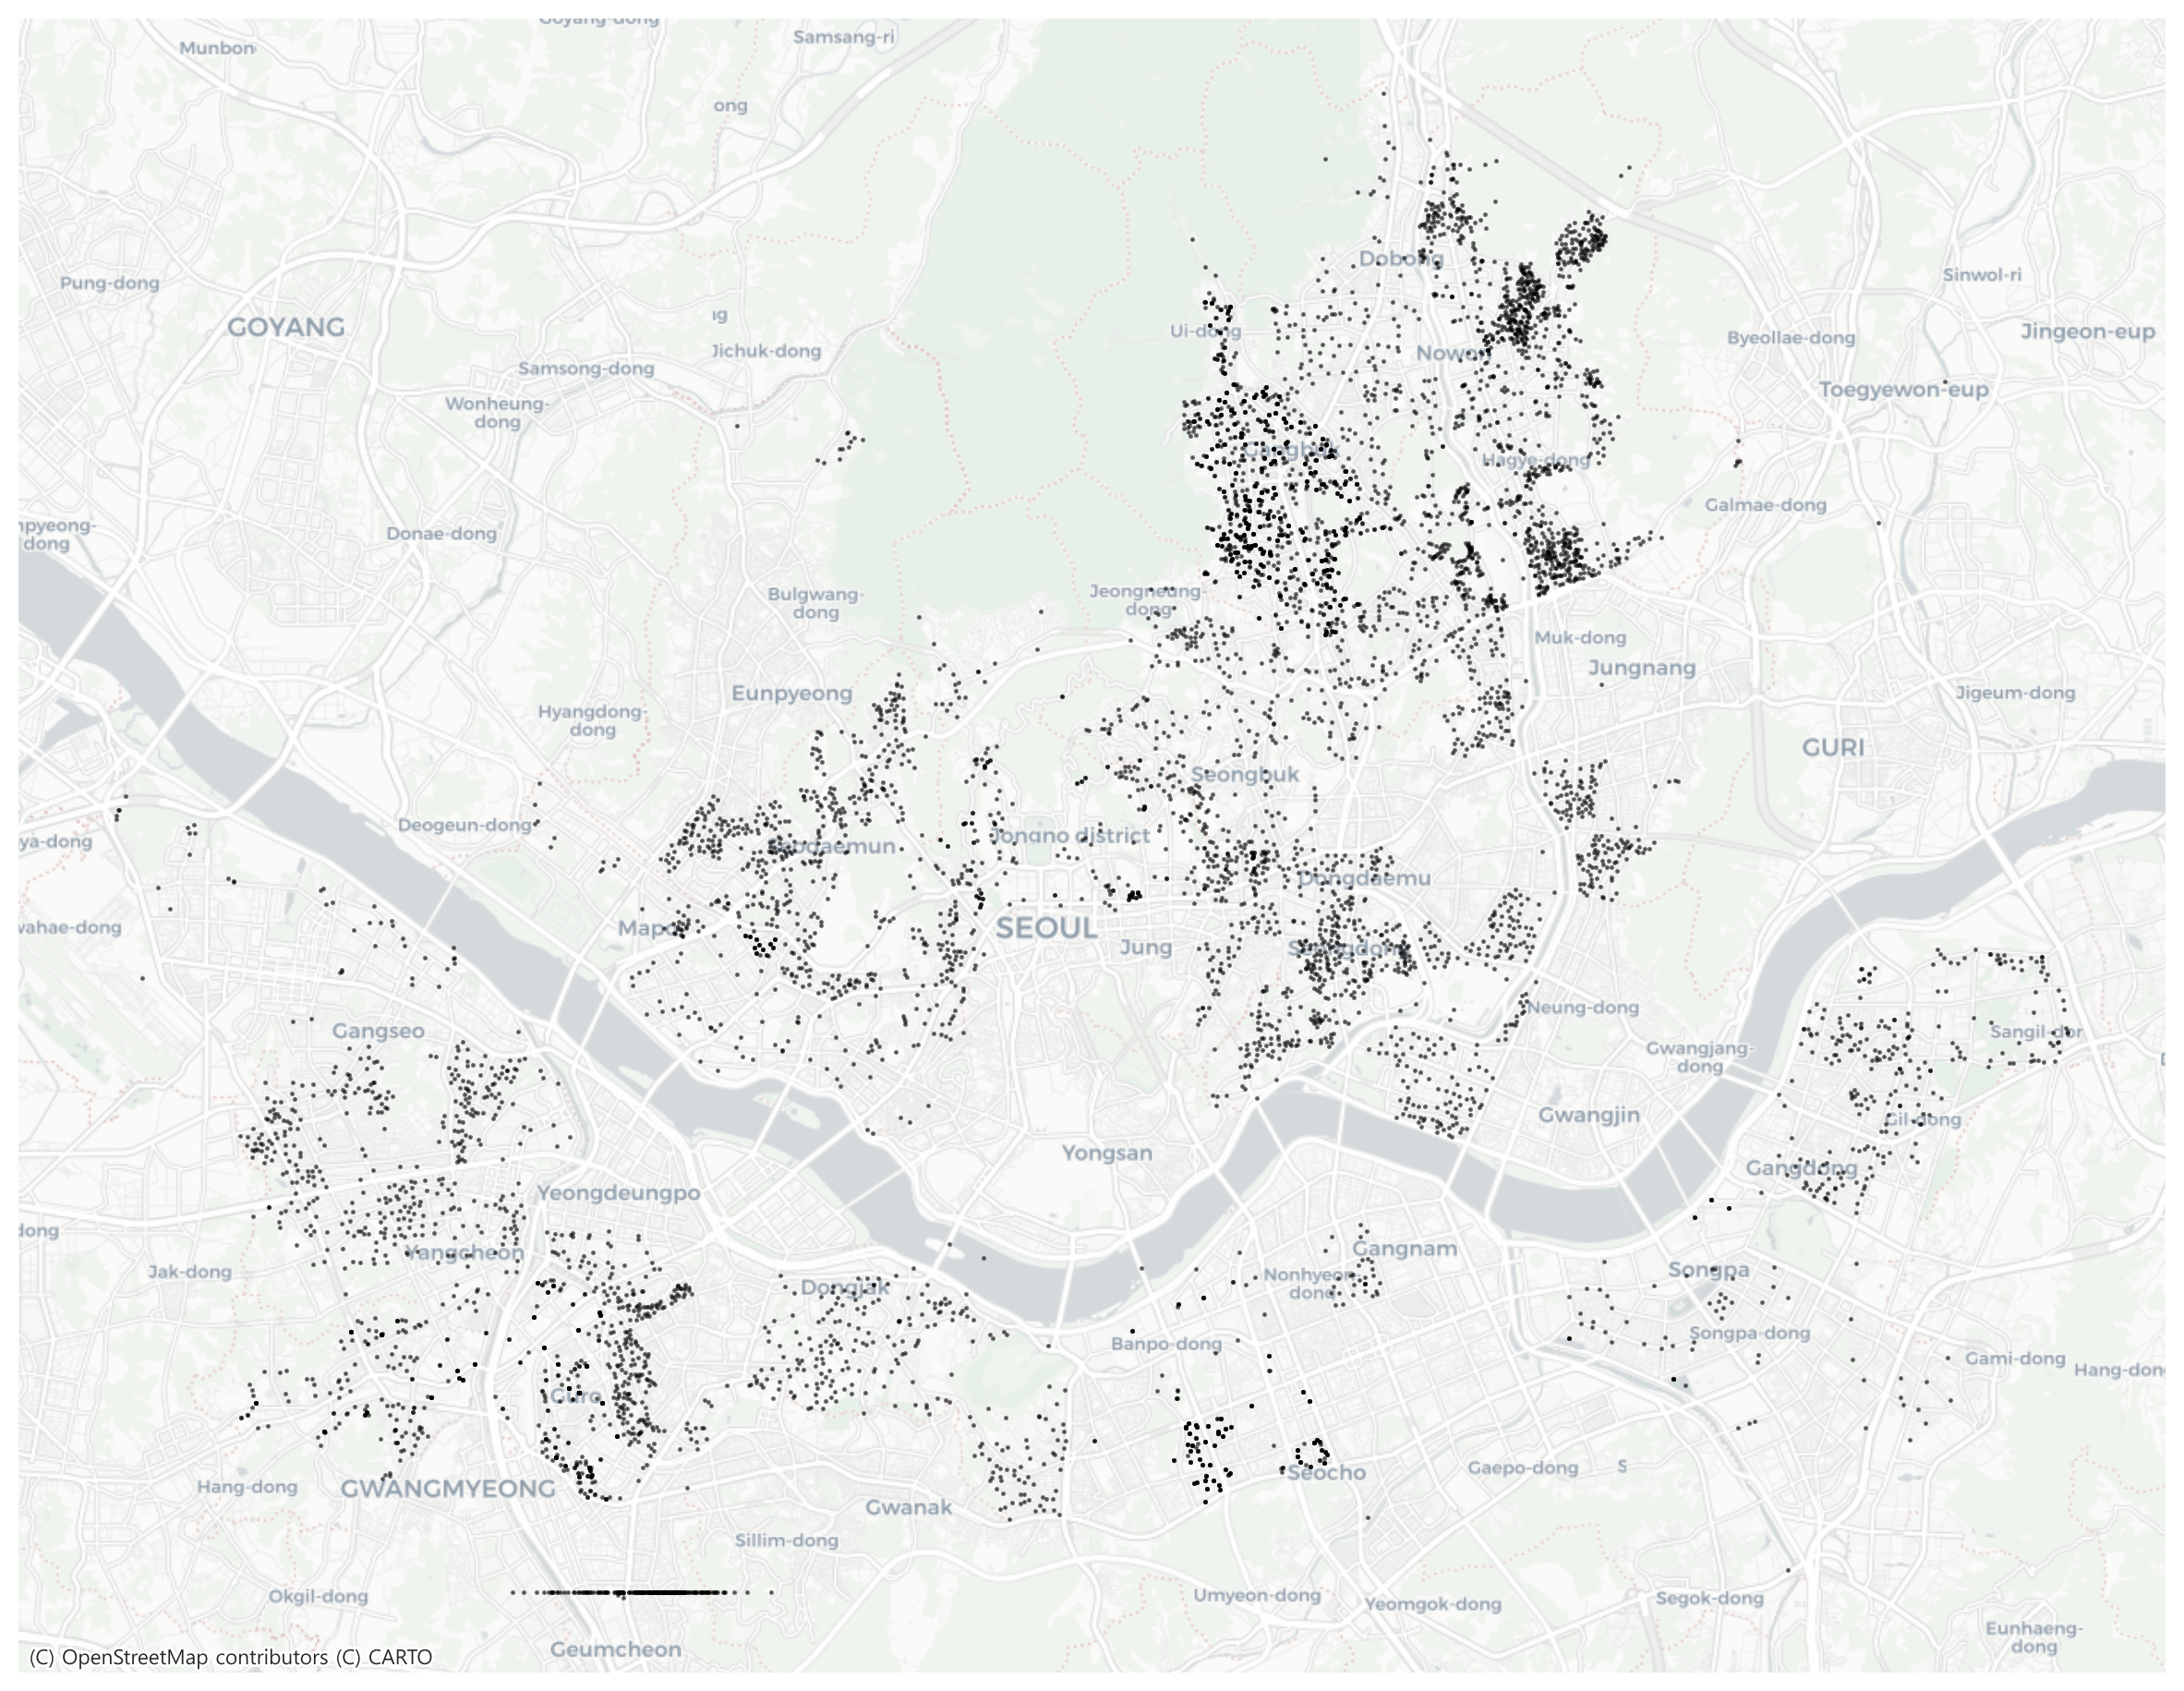

In [12]:
ax = gdf_cctv3857.plot(figsize=(15, 15), color='black', alpha=0.5, markersize=0.7)
# 배경지도 적용
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()

### 배경맵
https://contextily.readthedocs.io/en/latest/providers_deepdive.html  

http://maps.stamen.com/#toner/13/37.5500/126.9996

## Seaborn

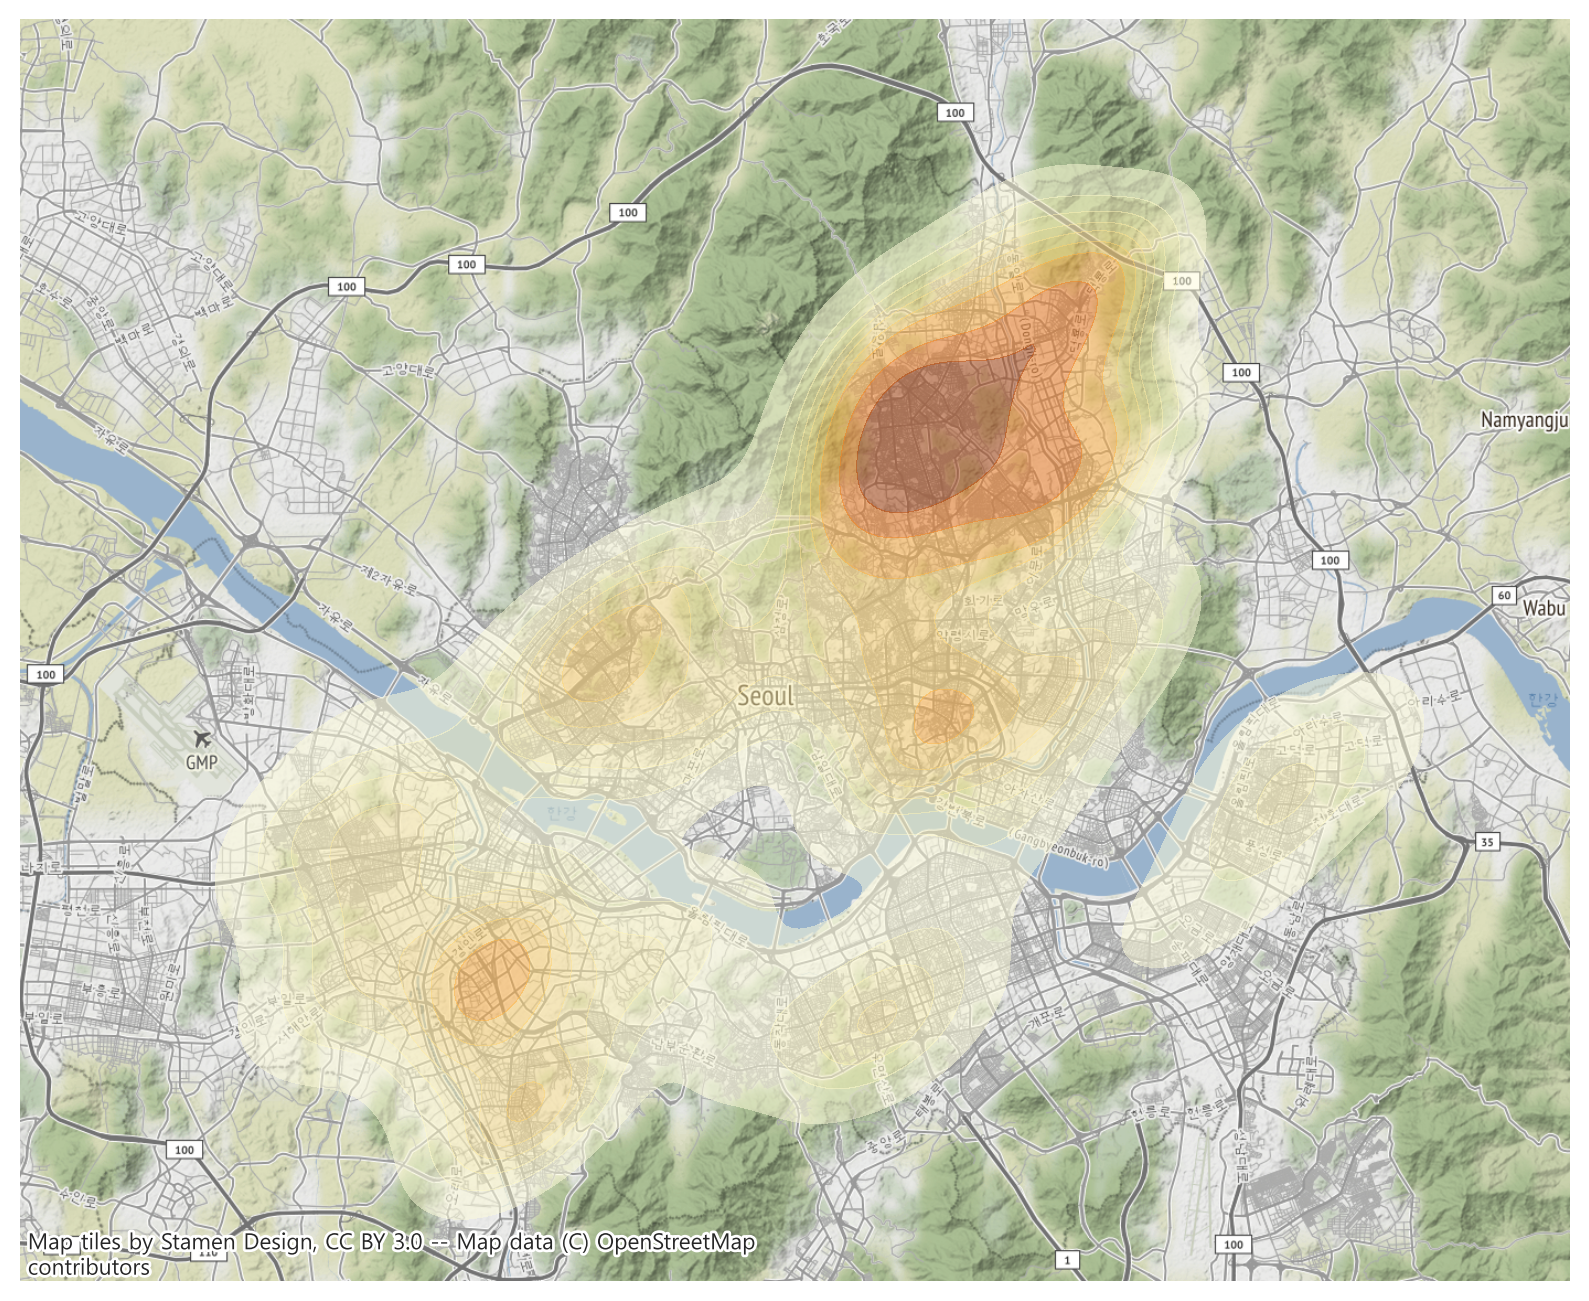

In [13]:
#Seaborn을 이용한 지리적 히트맵 
ax = sns.kdeplot(data=gdf_cctv3857, x=gdf_cctv3857["x"], y=gdf_cctv3857["y"], fill=True, cmap="YlOrBr", alpha=0.5)
ctx.add_basemap(ax, url=ctx.providers.CartoDB.DarkMatter)
ax.set_axis_off()
plt.show()

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=colormap

### Geoplot을 이용해서도 Heatmap을 표현할 수 있습니다.
https://residentmario.github.io/geoplot/gallery/plot_nyc_collision_factors.html  
https://residentmario.github.io/geoplot/gallery/plot_boston_airbnb_kde.html  

## 수고 많으셨습니다!!!